In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34','column 35','column 36','column 37','column 38','column 39','column 40','column 41','column 42','column 43','column 44','column 45','column 46','column 47','column 48','column 49','column 50','column 51','column 52','column 53','column 54','column 55','column 56','column 57']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Spam\Spam_NE_20.xlsx.', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,NaN,...,NaN,0.0,0.000,0.0,0.778,0.000,NaN,3.756,61.0,278.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.0,0.132,0.0,0.372,0.180,NaN,NaN,NaN,1028.0
2,0.00,0.00,NaN,0.0,NaN,0.00,0.31,0.63,0.31,0.63,...,NaN,NaN,0.135,0.0,0.135,NaN,0.0,3.537,40.0,NaN
3,0.00,0.00,0.00,NaN,1.85,0.00,NaN,NaN,0.00,0.00,...,0.0,NaN,0.223,0.0,0.000,0.000,0.0,3.000,15.0,54.0
4,0.00,0.00,0.00,NaN,1.92,0.00,NaN,0.00,0.00,0.64,...,0.0,0.0,0.054,0.0,0.164,0.054,NaN,1.671,4.0,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,0.00,0.64,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,NaN,0.0,0.348,0.0,1.160,NaN,0.0,3.121,15.0,103.0
4593,0.00,NaN,0.00,NaN,NaN,NaN,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.000,0.000,0.0,3.043,15.0,NaN
4594,NaN,0.00,NaN,0.0,0.00,0.00,0.00,0.00,0.00,NaN,...,0.0,0.0,0.136,0.0,NaN,0.000,NaN,1.837,NaN,68.0
4595,NaN,NaN,NaN,0.0,0.34,0.34,NaN,0.00,0.00,0.00,...,0.0,0.0,NaN,0.0,0.065,0.000,0.0,1.189,NaN,69.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	928
float64		column 2	1110
float64		column 3	870
float64		column 4	1052
float64		column 5	820
float64		column 6	870
float64		column 7	638
float64		column 8	588
float64		column 9	638
float64		column 10	812
float64		column 11	696
float64		column 12	1110
float64		column 13	870
float64		column 14	870
float64		column 15	1168
float64		column 16	994
float64		column 17	994
float64		column 18	696
float64		column 19	1052
float64		column 20	1168
float64		column 21	994
float64		column 22	1052
float64		column 23	994
float64		column 24	870
float64		column 25	1052
float64		column 26	994
float64		column 27	762
float64		column 28	762
float64		column 29	696
float64		column 30	870
float64		column 31	1052
float64		column 32	870
float64		column 33	986
float64		column 34	870
float64		column 35	870
float64		column 36	812
float64		column 37	812
float64		column 38	928
float64		column 39	762
float64		column 40	986
float64		column 41	638
float64		column 42	

In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
count,3669.000000,3487.000000,3727.000000,3545.000000,3777.000000,3727.000000,3959.000000,4009.000000,3959.000000,3785.000000,...,3495.000000,3959.000000,3553.000000,3603.000000,3603.000000,3603.000000,3371.000000,3727.000000,3545.000000,3487.000000
mean,0.094358,0.193768,0.265208,0.060164,0.287980,0.085211,0.104706,0.098670,0.082983,0.224824,...,0.028612,0.035056,0.129998,0.014979,0.244268,0.066073,0.028830,4.727002,46.642877,257.906510
std,0.298505,1.252689,0.481159,1.222702,0.621482,0.256325,0.373524,0.399752,0.267471,0.650422,...,0.304825,0.223582,0.218756,0.113333,0.642658,0.214668,0.278714,27.183415,119.762052,531.029295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.603500,7.000000,37.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.073000,0.000000,0.007000,0.000000,0.000000,2.315000,15.000000,101.000000
75%,0.000000,0.000000,0.380000,0.000000,0.350000,0.000000,0.000000,0.000000,0.000000,0.120000,...,0.000000,0.000000,0.178000,0.000000,0.294000,0.044500,0.000000,3.705000,43.000000,254.000000
max,4.540000,14.280000,5.100000,40.130000,8.330000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,5.277000,4.081000,19.131000,6.003000,13.129000,1102.500000,2204.000000,10062.000000


<AxesSubplot:>

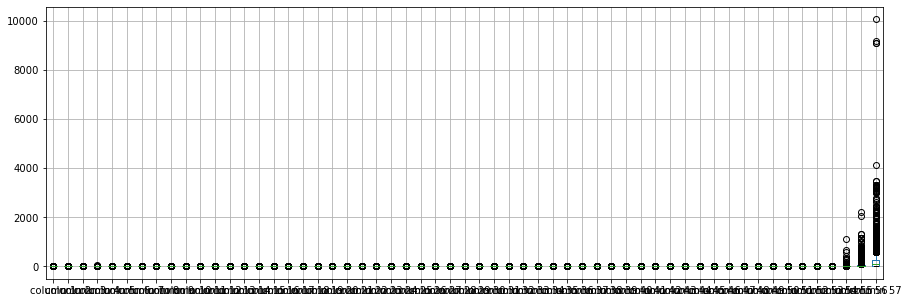

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.094358
column 2       0.193768
column 3       0.265208
column 4       0.060164
column 5       0.287980
column 6       0.085211
column 7       0.104706
column 8       0.098670
column 9       0.082983
column 10      0.224824
column 11      0.053597
column 12      0.519713
column 13      0.083257
column 14      0.054865
column 15      0.043540
column 16      0.217083
column 17      0.122992
column 18      0.171812
column 19      1.629475
column 20      0.070420
column 21      0.771932
column 22      0.094138
column 23      0.085334
column 24      0.078425
column 25      0.473100
column 26      0.236148
column 27      0.627095
column 28      0.106485
column 29      0.087918
column 30      0.088581
column 31      0.056787
column 32      0.040314
column 33      0.085611
column 34      0.038937
column 35      0.082860
column 36      0.087863
column 37      0.121181
column 38      0.010703
column 39      0.066905
column 40      0.057804
column 41      0.042741
column 42      0

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
column 1,1.000000,-0.004901,0.064629,0.024396,0.014388,0.065401,0.013676,-0.016207,0.102566,0.013532,...,-0.016635,-0.026426,-0.005384,-0.024851,0.055154,0.100375,-0.008187,0.036728,0.084168,0.062711
column 2,-0.004901,1.000000,-0.032966,-0.005074,-0.020220,-0.026750,-0.001847,-0.016557,-0.004525,0.043446,...,-0.013596,-0.007607,-0.048625,-0.016177,-0.011795,-0.006013,-0.006944,0.007104,0.002539,-0.017324
column 3,0.064629,-0.032966,1.000000,-0.014953,0.103220,0.091354,0.026413,0.011329,0.080848,0.064709,...,-0.036462,-0.032293,-0.030380,-0.046480,0.167497,0.115923,0.005890,0.093324,0.151679,0.092623
column 4,0.024396,-0.005074,-0.014953,1.000000,0.002240,-0.014110,0.009164,0.025578,0.003434,-0.004527,...,-0.003740,-0.001947,-0.012584,-0.006351,0.002024,0.012470,0.006877,0.001276,0.041358,0.027064
column 5,0.014388,-0.020220,0.103220,0.002240,1.000000,0.055303,0.148388,0.023410,0.020829,0.024683,...,-0.036707,-0.033502,-0.052204,-0.023221,0.030329,0.051785,-0.013573,0.069850,0.088142,0.010837
column 6,0.065401,-0.026750,0.091354,-0.014110,0.055303,1.000000,0.047105,0.064152,0.133777,0.022899,...,-0.025487,-0.013901,0.004735,-0.016304,0.064397,0.142153,0.043507,-0.006858,0.131256,0.089363
column 7,0.013676,-0.001847,0.026413,0.009164,0.148388,0.047105,1.000000,0.022638,0.045117,0.047389,...,-0.025586,-0.030692,-0.045879,-0.021709,0.056698,0.052949,0.038368,0.033266,0.065615,-0.003173
column 8,-0.016207,-0.016557,0.011329,0.025578,0.023410,0.064152,0.022638,1.000000,0.097077,0.063408,...,-0.016092,-0.024093,-0.027635,-0.014936,0.029607,0.056552,-0.003627,0.015460,0.054160,0.034935
column 9,0.102566,-0.004525,0.080848,0.003434,0.020829,0.133777,0.045117,0.097077,1.000000,0.122714,...,-0.022390,-0.017349,-0.017199,0.021857,0.055705,0.174503,0.006984,0.097838,0.276507,0.229099
column 10,0.013532,0.043446,0.064709,-0.004527,0.024683,0.022899,0.047389,0.063408,0.122714,1.000000,...,-0.018338,0.002424,-0.003424,-0.002163,0.044568,0.081590,0.023792,0.067741,0.153620,0.075068


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [17,17+112,17+112+112,17+112+112+112,17+112+112,17+112,17], vae_layer = False, seed = 1120)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [57]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 442.4677802162303
Epoch: 1 , loss: 441.90852292157217
Epoch: 2 , loss: 445.2847186364363
Epoch: 3 , loss: 440.8346365420245
Epoch: 4 , loss: 440.8407829896083
Epoch: 5 , loss: 442.21597850945767
Epoch: 6 , loss: 434.88913370591007
Epoch: 7 , loss: 435.20636661542835
Epoch: 8 , loss: 413.54932975104464
Epoch: 9 , loss: 361.02002880880644
Epoch: 10 , loss: 326.4086140489744
Epoch: 11 , loss: 309.19080225183575
Epoch: 12 , loss: 294.7091176634466
Epoch: 13 , loss: 295.6427636495451
Epoch: 14 , loss: 288.74466694688965
Epoch: 15 , loss: 277.1874965308851
Epoch: 16 , loss: 278.52059872723623
Epoch: 17 , loss: 271.12600280017386
Epoch: 18 , loss: 272.803951861551
Epoch: 19 , loss: 275.42789775569264
Epoch: 20 , loss: 279.66682784981015
Epoch: 21 , loss: 268.371200933689
Epoch: 22 , loss: 271.0870648958957
Epoch: 23 , loss: 280.0053562071265
Epoch: 24 , loss: 276.5653894537417
Epoch: 25 , loss: 278.3318153407

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(4597, 57)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      0.000000
column 2      0.030063
column 3      0.178071
column 4      0.000000
column 5      0.000000
column 6      0.018770
column 7      0.029476
column 8      0.104395
column 9      0.000000
column 10     0.000000
column 11     0.000000
column 12     0.000000
column 13     0.000000
column 14     0.043140
column 15    -0.018566
column 16     0.101900
column 17     0.000000
column 18     0.000000
column 19     0.000000
column 20     0.000000
column 21     0.000000
column 22     0.000000
column 23     0.000000
column 24     0.000000
column 25     0.371580
column 26     0.000000
column 27     0.000000
column 28     0.000000
column 29     0.000000
column 30     0.000000
column 31     0.000000
column 32     0.000000
column 33     0.000000
column 34     0.022273
column 35     0.000000
column 36     0.000000
column 37     0.000000
column 38     0.000000
column 39     0.000000
column 40     0.031224
column 41     0.000000
column 42     0.000000
column 43     0.017462
column 44  

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Spam.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-0.315468,...,0.065531,0.000000,0.000000,0.0,0.000000,0.000000,0.078026,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.035724,-2.513379,-81.674625,0.000000
2,0.000000,0.000000,0.136279,0.000000,-0.417401,0.000000,0.000000,0.000000,0.0,0.000000,...,0.002788,-0.006535,0.000000,0.0,0.000000,-0.085301,0.000000,0.000000,0.000000,-132.543831
3,0.000000,0.000000,0.000000,-0.036688,0.000000,0.000000,0.007890,-1.768815,0.0,0.000000,...,0.000000,-0.000378,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,-0.014443,0.000000,0.000000,0.082970,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.034979,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.021497,0.000000,0.000000,0.0,0.000000,0.031580,0.000000,0.000000,0.000000,0.000000
4593,0.000000,0.082358,0.000000,-0.044821,0.139187,0.096293,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.565216
4594,0.060449,0.000000,0.237422,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.121876,...,0.000000,0.000000,0.000000,0.0,0.107223,0.000000,-0.410645,0.000000,-1.188325,0.000000
4595,-0.172227,0.132045,-0.440022,0.000000,0.000000,0.000000,0.055805,0.000000,0.0,0.000000,...,0.000000,0.000000,0.071226,0.0,0.000000,0.000000,0.000000,0.000000,10.437107,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

28424.947456087164

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

47458.653692284744

In [18]:
NRMS=numerator/denominator
NRMS


0.5989412940449288

In [19]:
new_df.iloc[66,:]

column 1       0.000000
column 2       0.440000
column 3       0.074212
column 4      -0.174841
column 5       0.440000
column 6       0.021793
column 7       0.000000
column 8       0.000000
column 9      -0.034233
column 10      0.000000
column 11      0.000000
column 12      0.440000
column 13      0.000000
column 14      0.000000
column 15     -0.066898
column 16      0.440000
column 17      0.000000
column 18      0.890000
column 19      2.240000
column 20     -0.021518
column 21      0.308278
column 22      0.000000
column 23     -0.070492
column 24      0.000000
column 25      0.000000
column 26      0.000000
column 27      0.183123
column 28      0.000000
column 29      0.000000
column 30      0.000000
column 31      0.000000
column 32      0.000000
column 33      0.000000
column 34      0.000000
column 35      0.000000
column 36      0.000000
column 37      0.000000
column 38      0.114139
column 39      0.000000
column 40      0.000000
column 41      0.049196
column 42      0

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.000000,0.640000,0.640000,0.000000,0.320000,0.000000,0.000000,0.000000,0.00,-0.315468,...,0.065531,0.000000,0.000000,0.0,0.778000,0.000000,0.078026,3.756000,61.000000,278.000000
1,0.210000,0.280000,0.500000,0.000000,0.140000,0.280000,0.210000,0.070000,0.00,0.940000,...,0.000000,0.000000,0.132000,0.0,0.372000,0.180000,0.083724,2.600621,19.325375,1028.000000
2,0.000000,0.000000,0.136279,0.000000,0.212599,0.000000,0.310000,0.630000,0.31,0.630000,...,0.002788,-0.006535,0.135000,0.0,0.135000,-0.085301,0.000000,3.537000,40.000000,58.456169
3,0.000000,0.000000,0.000000,-0.036688,1.850000,0.000000,0.007890,0.081185,0.00,0.000000,...,0.000000,-0.000378,0.223000,0.0,0.000000,0.000000,0.000000,3.000000,15.000000,54.000000
4,0.000000,0.000000,0.000000,-0.014443,1.920000,0.000000,0.082970,0.000000,0.00,0.640000,...,0.000000,0.000000,0.054000,0.0,0.164000,0.054000,0.034979,1.671000,4.000000,112.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.000000,0.000000,0.640000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.021497,0.000000,0.348000,0.0,1.160000,0.031580,0.000000,3.121000,15.000000,103.000000
4593,0.000000,0.082358,0.000000,-0.044821,0.139187,0.096293,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,3.043000,15.000000,72.565216
4594,0.060449,0.000000,0.237422,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.121876,...,0.000000,0.000000,0.136000,0.0,0.107223,0.000000,-0.001645,1.837000,10.811675,68.000000
4595,-0.002227,0.132045,0.239978,0.000000,0.340000,0.340000,0.055805,0.000000,0.00,0.000000,...,0.000000,0.000000,0.103226,0.0,0.065000,0.000000,0.000000,1.189000,15.437107,69.000000


In [21]:
imputations[-1].to_excel("Spam_NE_20(imp).xlsx", index=False, header=False)